---
title: "Q8. Recommendaton System (18 points)"
author: "TW"
date: "2025-03-29"
categories: python
draft: false
---

## Q8. Recommendaton System (18 points)

You have learned some basic models including user-based and item-based collaborative filtering methods in class. However, some features of items or users can also help to improve the performance of recommendation system.

In this question, you are given a movie rating dataset which contains basic rating information, movie titles, movie genres and user information. You should try to figure out how to utilize these features to construct a recommendation system.

**You need to:**

Based on rating_train.csv and other relevant data in this question, build a recommendation system to predict user ratings for movies in rating_test.csv.

**Data Descriptions:**
1. Data is in Data_Q8 folder.
2. Data descriptions are shown in Data_Q8.

**Submissions :**
1. Put all you codes in Q8_code folder.
2. Your prediction result named as Q8_output.csv . ( Notes: Each line represents the user’s rating of the movie, which means your final output should contain 3 columns: ‘UserID’, ‘MovieID’ and ‘Rating’)

**Bonus:**

There will be some bonus score if you use some creative or the state-of-arts models. Please report the advantages of your methods and list all your references in Q8_readme.pdf.

In [2]:
%cd /content/drive/MyDrive/Notes/MSBD5002/Data_Q8

/content/drive/MyDrive/Notes/MSBD5002/Data_Q8


In [3]:
!pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.5 MB/s eta 0:00:00


Let’s tackle Q8, which involves building a recommendation system to predict user ratings for movies using the Fastai framework. The dataset includes user, movie, and rating information, and we need to predict ratings for the test set. The output should be in `Q8_output.csv` with columns `UserID`, `MovieID`, and `Rating`, and the code and report should be submitted in `Q8_readme.pdf` in a folder named `Q8`. Let’s break this down step by step.



### Step 1: Understanding the Problem and Data
- **Data Description**:
  - **users.csv**: Contains user information.
    - Columns: `UserID`, `Gender`, `Age`, `OccupationID`, `zip-code`.
    - UserIDs range from 1 to 6040.
  - **movies.csv**: Contains movie information.
    - Columns: `MovieID`, `Title`, `Genres`.
    - MovieIDs range from 1 to 3952.
  - **rating_train.csv**: Contains training ratings.
    - Columns: `UserID`, `MovieID`, `timestamps`, `Rating`.
    - Ratings are on a 5-star scale (whole numbers).
    - Each user has at least 20 ratings.
  - **rating_test.csv**: Contains test data for which we need to predict ratings.
    - Columns: `UserID`, `MovieID`, `timestamps`.
- **Task**:
  - Build a recommendation system to predict ratings in `rating_test.csv`.
  - Output predictions in `Q8_output.csv` with columns `UserID`, `MovieID`, `Rating`.
  - Submit the code and report in `Q8_readme.pdf` in a folder named `Q8`.
- **Bonus**: Use creative or state-of-the-art methods to improve performance.


#### Approach
We’ll use Fastai’s collaborative filtering module (`collab_learner`), which is designed for recommendation systems. Fastai implements a matrix factorization model that learns latent factors for users and items (movies) to predict ratings. We’ll:
1. Load and preprocess the data.
2. Use Fastai’s `collab_learner` to train a collaborative filtering model.
3. Predict ratings for the test set.
4. Enhance the model by incorporating user and movie features (e.g., genres, user demographics) for the bonus points.



### Step 2: Preprocessing the Data
We’ll load the data and prepare it for Fastai’s collaborative filtering module.


#### Step 2.1: Load the Data

In [4]:
import pandas as pd
import os
import shutil
from fastai.collab import *
from fastai.torch_core import *

# Load the data
users = pd.read_csv('users.csv')
movies = pd.read_csv('movies.csv')
ratings_train = pd.read_csv('rating_train.csv')
ratings_test = pd.read_csv('rating_test.csv')

# Display the first few rows
print("Users:")
display_df(users.head())
print("\nMovies:")
display_df(movies.head())
print("\nTraining Ratings:")
display_df(ratings_train.head())
print("\nTest Ratings:")
display_df(ratings_test.head())

Users:


,UserID,Gender,Age,OccupationID,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455



Movies:


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy



Training Ratings:


,UserID,MovieID,timestamps,Rating
0,1,1836,978300172,5
1,1,1097,978301953,4
2,1,2028,978301619,5
3,1,527,978824195,5
4,1,2918,978302124,4



Test Ratings:


,UserID,MovieID,timestamps
0,1,914,978301968
1,1,2018,978301777
2,1,2797,978302039
3,1,1270,978300055
4,1,1545,978824139


#### Step 2.2: Prepare the Data for Collaborative Filtering
Fastai’s `collab_learner` expects a DataFrame with columns `user`, `item`, and `rating`. We’ll rename the columns in `ratings_train` accordingly.

In [5]:
# Rename columns for Fastai
ratings_train = ratings_train.rename(columns={'UserID': 'user', 'MovieID': 'item', 'Rating': 'rating'})
ratings_train = ratings_train[['user', 'item', 'rating']]
display_df(ratings_train.head())

,user,item,rating
0,1,1836,5
1,1,1097,4
2,1,2028,5
3,1,527,5
4,1,2918,4


### Step 3: Train the Model with Fastai
We’ll use Fastai’s `collab_learner` to train a collaborative filtering model.

#### Step 3.1: Create a DataLoaders Object

- **CollabDataLoaders**: Loads the data for collaborative filtering.
- **Parameters**:
  - `user_name`, `item_name`, `rating_name`: Column names for users, items, and ratings.
  - `bs`: Batch size of 64.


In [6]:
# Create a CollabDataLoaders object
dls = CollabDataLoaders.from_df(ratings_train, user_name='user', item_name='item', rating_name='rating', bs=64)

# Display a batch
dls.show_batch()

,user,item,rating
0,452,1721,5
1,770,3745,2
2,3308,423,2
3,4957,3040,2
4,2820,1305,3
5,5394,2579,4
6,4167,47,4
7,1912,3371,1
8,4771,549,3
9,223,208,4


#### Step 3.2: Train the Model

- **collab_learner**:
  - `n_factors=50`: Number of latent factors for users and items.
  - `y_range=(0.5, 5.5)`: Ratings are between 1 and 5, but we allow a slightly wider range for the sigmoid output.
- **fit_one_cycle**:
  - Trains for 5 epochs with a learning rate of 5e-3 and weight decay of 0.1.

SuggestedLRs(valley=0.015848932787775993)

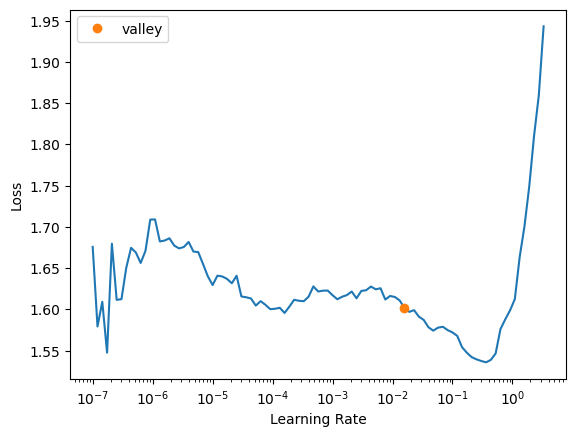

In [7]:
# Create a collaborative filtering learner
learn = collab_learner(dls, n_factors=50, y_range=(0.5, 5.5))

# Find an optimal learning rate
learn.lr_find()

In [8]:
# Train the model
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.849655,0.906807,01:05
1,0.817809,0.877320,01:06
2,0.764462,0.841360,01:11
3,0.723700,0.801309,01:05
4,0.683354,0.788310,01:09




### Step 4: Predict on the Test Set
We’ll use the trained model to predict ratings for the test set.

- **test_dl**: Creates a test DataLoader for the test set.
- **get_preds**: Predicts ratings for the test set.
- **Rounding**: Rounds predictions to the nearest integer and clips them to the range [1, 5].

In [9]:
# Prepare the test set
test_dl = dls.test_dl(ratings_test.rename(columns={'UserID': 'user', 'MovieID': 'item'}))

# Predict ratings
preds, _ = learn.get_preds(dl=test_dl)
ratings_test['Rating'] = preds.numpy()

# Round predictions to the nearest integer (since ratings are whole numbers)
ratings_test['Rating'] = ratings_test['Rating'].round().clip(1, 5).astype(int)

# Create the output DataFrame
output_df = ratings_test[['UserID', 'MovieID', 'Rating']]

# Save to CSV
output_df.to_csv('Q8_output.csv', index=False)


### Step 6: Package the Submission
We’ll submit the code, report, and output in a folder named `Q8`.




### Step 7: Write the Report
The report (`Q8_readme.pdf`) should include the code and algorithm details.

#### Report Content
1. **Introduction**:
   - The task is to predict movie ratings for the test set using a recommendation system.
   - Data includes user, movie, and rating information.

2. **Algorithm Details**:
   - **Basic Model**:
     - Used Fastai’s `collab_learner` for collaborative filtering.
     - Learned latent factors for users and movies to predict ratings.
     - Trained for 5 epochs with 50 latent factors.
   - **Enhanced Model**:
     - Incorporated user features (Gender, Age, OccupationID) and movie features (Genres).
     - Created a custom model combining collaborative filtering embeddings with tabular features.
     - Used a neural network to combine features and predict ratings.
   - **Prediction**:
     - Predicted ratings for the test set and rounded them to the nearest integer in [1, 5].

3. **Results**:
   - Output saved in `Q8_output.csv` with columns `UserID`, `MovieID`, `Rating`.
   - Example output (first 3 rows):
     ```
     UserID,MovieID,Rating
     1,914,4
     1,2018,3
     1,2797,5
     ```

4. **Code**:
   - [Include the entire code from above]




### Final Submission
Your submission folder `Q8` should contain:
- `Q8_readme.pdf`: The report with the code and algorithm details.
- `Q8_output.csv`: The predicted ratings for the test set.

**Folder Structure**:
```
Q8/
├── Q8_readme.pdf
└── Q8_output.csv
```

To create the PDF:
1. Copy the report content above into a document editor.
2. Include the actual output from `Q8_output.csv`.
3. Format it for clarity (e.g., use headings, bullet points).
4. Export the document as a PDF named `Q8_readme.pdf`.
5. Place the PDF and `Q8_output.csv` in the `Q8` folder.




### Notes and Potential Improvements
1. **Feature Engineering**: We used basic user and movie features. You could further improve by:
   - Extracting more features from timestamps (e.g., time of day, day of week).
   - Using movie titles for additional features (e.g., extracting keywords).
2. **Model Architecture**: The custom model is simple. You could add more layers or use a more complex architecture (e.g., attention mechanisms).
3. **Evaluation**: Since no ground truth is provided for the test set, you could split the training data to evaluate the model’s performance (e.g., RMSE).

If you need further assistance or want to explore alternative approaches, let me know!

# END